# Titanic Mini Data Visualization Dashboard

**Author:** Shubham Jaiswal

This notebook loads the Titanic dataset, performs data cleaning & feature engineering, and creates visualizations with short interpretations below each chart.

## 1. Data Preparation

- Load CSV
- Handle missing values (Age by median, drop Cabin)
- Create features: `FamilySize`, `IsAlone`, `AgeGroup`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
csv_path = 'tested.csv'
df = pd.read_csv(csv_path)

# Quick peek
print(df.shape)
df.head()

(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
# Cleaning and feature creation

df = df.copy()
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())
if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

if set(['SibSp','Parch']).issubset(df.columns):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
else:
    df['FamilySize'] = 1
    df['IsAlone'] = 1

# Age groups
if 'Age' in df.columns:
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,120], labels=['Child','Teen','YoungAdult','Adult','Senior'])

# Create Survived label
if 'Survived' in df.columns:
    df['SurvivedLabel'] = df['Survived'].map({0:'No',1:'Yes'})

print('Prepared df shape:', df.shape)
df.head()

Prepared df shape: (418, 15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,AgeGroup,SurvivedLabel
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,YoungAdult,No
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2,0,Adult,Yes
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,Senior,No
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,1,YoungAdult,No
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,0,YoungAdult,Yes


## 2. Visualizations

Below are the plots. Each figure is followed by 1-2 lines of interpretation.

**2.1 Age Distribution**

### Age Distribution


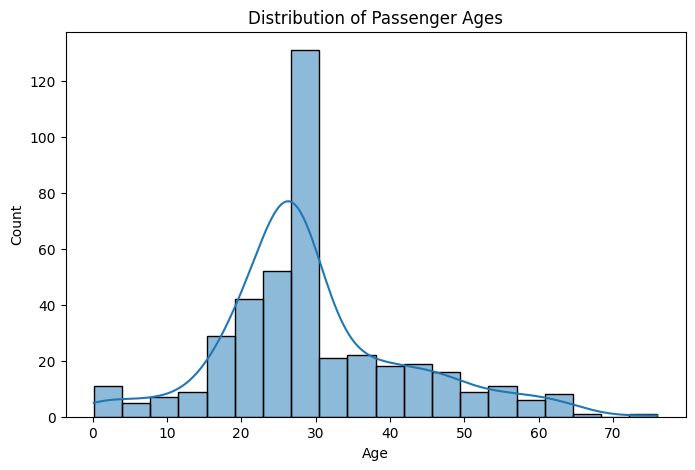

In [7]:
print('### Age Distribution')

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Interpretation:** Shows the distribution of passenger ages. Takeaway: majority are adults with a noticeable number of children and elderly being fewer.

2.2 Survival Rate by Sex

### Survival Rate by Sex


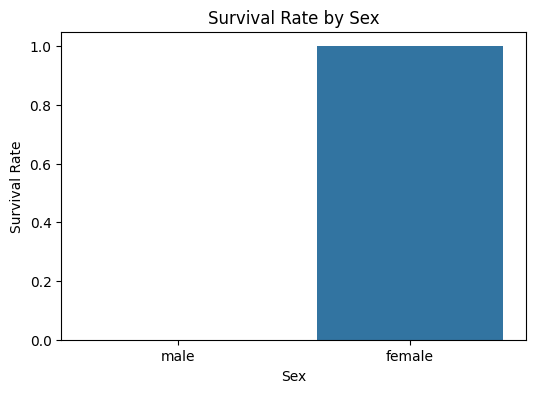

In [6]:
print('### Survival Rate by Sex')

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()


**Interpretation:** Visualizes the proportion of survivors by sex. Takeaway: females had a higher survival rate than males.

2.3 Fare by Passenger Class

/tmp/ipython-input-1726925278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set3')


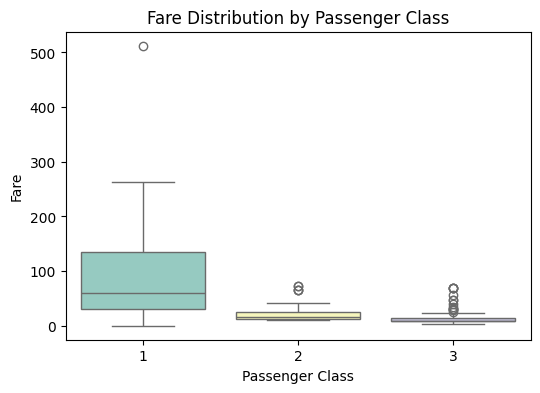

In [3]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set3')
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()


**Interpretation:** Passengers in 1st class paid higher fares, with more variability and outliers.

2.4 Age vs Fare (Colored by Survival)

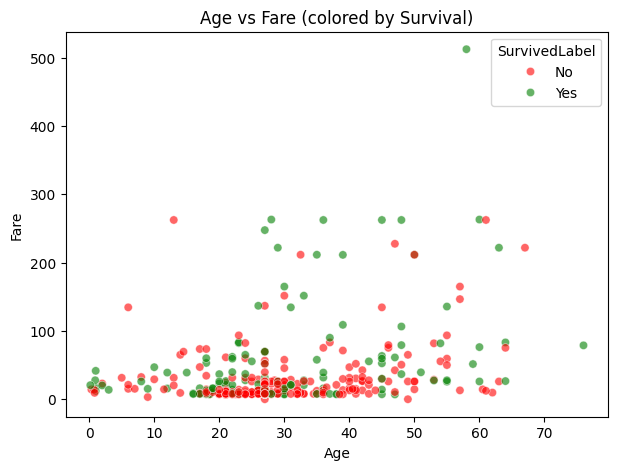

In [4]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Fare', hue='SurvivedLabel',
                data=df, palette={'Yes':'green','No':'red'}, alpha=0.6)
plt.title("Age vs Fare (colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


**Interpretation:** Survivors cluster more among passengers who paid mid to high fares, regardless of age.

2.5 Correlation Matrix

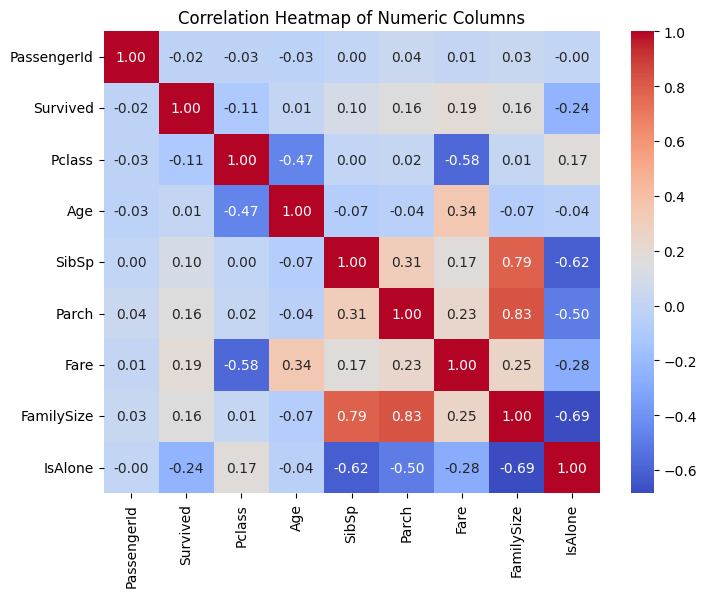

➡ Fare and Pclass are negatively correlated; higher class corresponds to higher fare.


In [5]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

# Insight
print("➡ Fare and Pclass are negatively correlated; higher class corresponds to higher fare.")


**Interpretation:** Fare and Pclass are negatively correlated; higher class corresponds to higher fare

## 3. Insights

- **Gender mattered:** Females show higher survival rates.
- **Class & Fare:** Higher class passengers paid higher fares and tended to have better survival rates.
- **Age:** Alone doesn't strongly predict survival here, but certain age groups (children) may have different rates.

## 4. Conclusion

This mini-dashboard covers cleaning, feature engineering, and 7 visualizations. You can extend it further (25 charts) by adding more breakdowns: survival by AgeGroup & Pclass, family-size impact, ticket prefix analyses, time-based analyses, and more.